In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

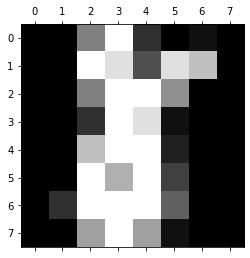

In [4]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1789])
plt.show()

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [24]:
X=digits.images.reshape((digits.images.shape[0],8,8,1))

In [25]:
X_train_full=X[:1400]
X_test=X[1400:]
y_train=digits.target[:1400]
y_test=digits.target[1400:]

In [26]:
X_train_full[0]

array([[[ 0.],
        [ 0.],
        [ 5.],
        [13.],
        [ 9.],
        [ 1.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [13.],
        [15.],
        [10.],
        [15.],
        [ 5.],
        [ 0.]],

       [[ 0.],
        [ 3.],
        [15.],
        [ 2.],
        [ 0.],
        [11.],
        [ 8.],
        [ 0.]],

       [[ 0.],
        [ 4.],
        [12.],
        [ 0.],
        [ 0.],
        [ 8.],
        [ 8.],
        [ 0.]],

       [[ 0.],
        [ 5.],
        [ 8.],
        [ 0.],
        [ 0.],
        [ 9.],
        [ 8.],
        [ 0.]],

       [[ 0.],
        [ 4.],
        [11.],
        [ 0.],
        [ 1.],
        [12.],
        [ 7.],
        [ 0.]],

       [[ 0.],
        [ 2.],
        [14.],
        [ 5.],
        [10.],
        [12.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 6.],
        [13.],
        [10.],
        [ 0.],
        [ 0.],
        [ 0.]]])

In [27]:
X_train_n=X_train_full.astype('float32')
X_test_n=X_test.astype('float32')
X_train=X_train_n/255.
X_test=X_test_n/255.

In [28]:
model=keras.models.Sequential()

In [29]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(8,8,1)))

In [30]:
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

In [31]:
model.add(keras.layers.Flatten())

In [32]:
model.add(keras.layers.Dense(units=100,activation='relu'))

In [33]:
model.add(keras.layers.Dense(units=10,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 32)          320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               28900     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 30,230
Trainable params: 30,230
Non-trainable params: 0
_________________________________________________________________


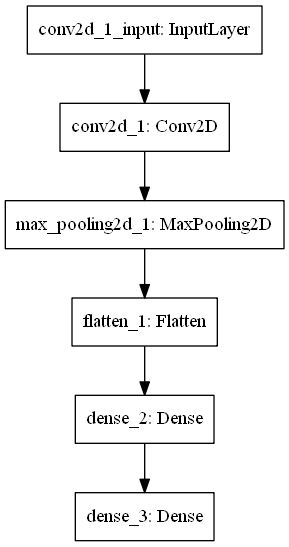

In [35]:
import pydot
keras.utils.plot_model(model)

In [36]:
weights,biases=model.layers[3].get_weights()

In [37]:
weights

array([[ 0.08465321, -0.10040881, -0.09504327, ..., -0.11978766,
        -0.06918108,  0.02965074],
       [-0.0362937 ,  0.09273862, -0.05231378, ..., -0.02432887,
        -0.09129513, -0.07728741],
       [-0.00931457,  0.05569997,  0.01706702, ...,  0.09461025,
         0.09961572, -0.10372747],
       ...,
       [-0.02553345,  0.07215547,  0.06382156, ...,  0.0304893 ,
        -0.08495404,  0.02291938],
       [ 0.08962157,  0.06726738, -0.0652139 , ..., -0.02468096,
        -0.01079018, -0.11373593],
       [ 0.0917696 ,  0.0473787 , -0.05899324, ...,  0.11920252,
        -0.01954371,  0.08389785]], dtype=float32)

In [38]:
weights.shape

(288, 100)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [40]:

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
model_history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.9314 - val_loss: 0.6139 - val_accuracy: 0.8438
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.9250 - val_loss: 0.6145 - val_accuracy: 0.8388
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.9314 - val_loss: 0.6182 - val_accuracy: 0.8438
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.9336 - val_loss: 0.6095 - val_accuracy: 0.8413
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.9286 - val_loss: 0.6046 - val_accuracy: 0.8514
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3100 - accuracy: 0.9314 - val_loss: 0.6077 - val_accuracy: 0.8413
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.9321 - val_loss: 0.6082 - val_accuracy: 0.8413
Epoch 8/100
4

In [48]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 44}

In [49]:
model_history.history

{'loss': [0.3195732533931732,
  0.3174563944339752,
  0.3150222599506378,
  0.31405848264694214,
  0.311124712228775,
  0.3100067675113678,
  0.30823439359664917,
  0.3072003424167633,
  0.3054901957511902,
  0.302963525056839,
  0.30278071761131287,
  0.2977951765060425,
  0.299159973859787,
  0.29619625210762024,
  0.29623347520828247,
  0.2926400899887085,
  0.2937634587287903,
  0.2905951738357544,
  0.28940480947494507,
  0.28757596015930176,
  0.2859313189983368,
  0.28422078490257263,
  0.2837648093700409,
  0.2826076149940491,
  0.2809622287750244,
  0.2797420024871826,
  0.2780150771141052,
  0.2773262560367584,
  0.2754861116409302,
  0.27545830607414246,
  0.27375486493110657,
  0.2717268466949463,
  0.27034950256347656,
  0.2682691812515259,
  0.26733848452568054,
  0.2660926878452301,
  0.26594337821006775,
  0.26314499974250793,
  0.2620371878147125,
  0.26101264357566833,
  0.25965556502342224,
  0.25911447405815125,
  0.2583351135253906,
  0.25631287693977356,
  0.25496

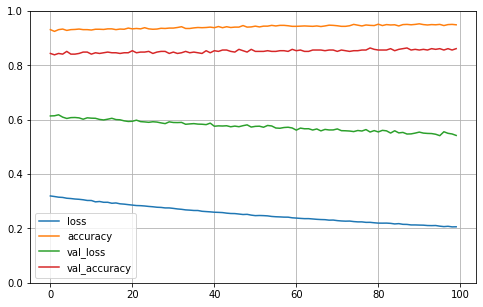

In [50]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [51]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.8615


[0.5421712398529053, 0.8614609837532043]

In [52]:
X_new=X_test[:3]

In [53]:
y_pred=model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 8, 2], dtype=int64)

In [54]:
y_test[:3]

array([2, 8, 2])